In [1]:
#Simple Linear Regression
#Import the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
X = dataset.iloc[:,:-1].values #independent
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
y = dataset.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
# Split the dataset into the training and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)
X_test

array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

In [6]:
# Simple Linear Regression on Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Predict the Test set result
y_pred = regressor.predict(X_test)

In [8]:
y_test

array([46205., 39343., 61111., 57189., 98273., 93940.])

In [9]:
y_pred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

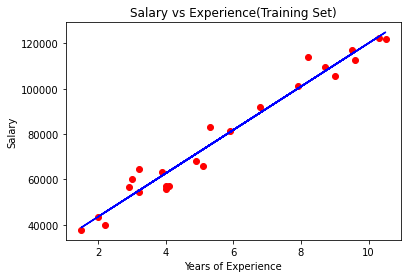

In [10]:
# Visualize the Training Set
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

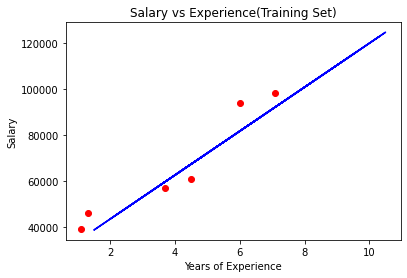

In [13]:
# Visualize the Test Set
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')  #unchanged
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## MULTIPLE LINEAR REGRESSION

In [14]:
#Import the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#Import the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [20]:
X = dataset.iloc[:,:-1].values #independent
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [21]:
y = dataset.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [23]:
#  Encoding the Categorical Data
# Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [25]:
# Split the dataset into the training and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)
X_train

array([[0.0, 0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1.0, 0.0, 0.0, 64664.71, 139553.16, 137962.62],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 0.0, 1.0, 86419.7, 153514.11, 0.0],
       [1.0, 

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])
X_train

array([[0.0, 0.0, 1.0, 0.00037872457724417156, -0.7292109740014628,
        -0.5914600726489033],
       [0.0, 0.0, 1.0, -1.767329056534053, -2.44018931036272,
        -1.7902230075904662],
       [0.0, 0.0, 1.0, 0.4073604843240593, 0.919071691510221,
        0.6194520202092301],
       [0.0, 1.0, 0.0, 0.3890273980787981, 0.27996059968206977,
        0.34030279826732956],
       [0.0, 0.0, 1.0, -0.11368541662587793, 0.2995461809020889,
        1.2215801785525084],
       [0.0, 1.0, 0.0, -0.497572030480735, -0.593301069883309,
        0.040092500402926924],
       [1.0, 0.0, 0.0, 0.02277142681225839, 0.07398645231385274,
        0.46400916050450397],
       [0.0, 1.0, 0.0, 1.7656727798857663, -0.6621149628906479,
        1.6884714073935296],
       [1.0, 0.0, 0.0, -0.28566603734403306, 0.7202386492559654,
        -0.6137357317874431],
       [0.0, 1.0, 0.0, 0.991638329882562, 1.331890264567585,
        0.39721143268820364],
       [0.0, 1.0, 0.0, -0.34736623885987417, -0.140389587992235

In [29]:
# Fitting the Multiple Linear Regression Model on the Training Set
# Simple Linear Regression on Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = regressor.predict(X_test)
np.set_printoptions(0)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 74061.  90708.]
 [ 46009.  42560.]
 [ 99637. 103282.]
 [155787. 149760.]
 [127637. 134307.]
 [192765. 192262.]
 [ 63907.  65200.]
 [ 54935.  49491.]
 [ 84532.  81006.]
 [109460. 108734.]]


In [36]:
len(y_pred)

10

In [52]:
#MAE : Mean Absolute Error : Comparing two models
from sklearn.metrics import mean_absolute_error as me
print(me(y_test,y_pred))

4793.266837947899


In [51]:
# Model Prediction
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9783259006626639

## POLYNOMIAL LINEAR REGRESSION EQUATION

In [53]:
#Import the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#Import the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [55]:
X = dataset.iloc[:,1:-1].values #independent
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [56]:
y = dataset.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [57]:
#Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# Train the Model with Polynomial_Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
list(regressor.predict([[6.5]])) #Linear Regressor

[330378.78787878784]

In [61]:
list(lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))  #Polynomial Regressor

[158862.45265154913]

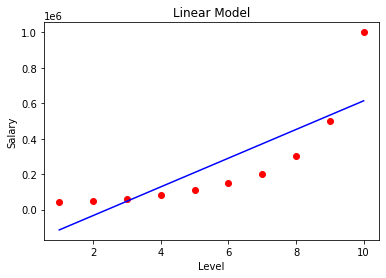

In [65]:
#Linear Regression
plt.scatter(X,y,color = 'red')
plt.plot(X,regressor.predict(X),color = 'blue')
plt.title('Linear Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

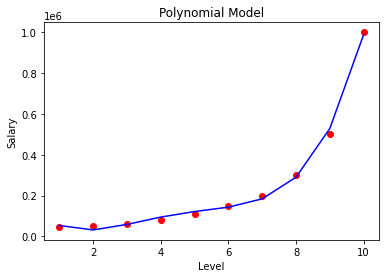

In [77]:
#Polynomial Regression
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Polynomial Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()